<a href="https://colab.research.google.com/github/eco-health/deep-eco-health/blob/main/codes_eco_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing database apis and additional libraries
!pip install wget
!pip install importlib-metadata==4.11.4
!pip install  geopandas rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ecf106253e0908315a7fe4a6e2a3e61a3a0b37b4ae915df144abf7a2fe6b7650
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.0.0
    Uninstalling importlib-metadata-5.0.0:
      Successfully uninstalled importlib-metadata-5.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata

In [11]:
# basic libraries
import os, glob
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to manage shapefiles
import geopandas as gpd

# to manage rasters (tifs and ncs)
import xarray as xr
import rioxarray
import rasterio

# Costa Rica Boundary

Reference: Made with Natural Earth. Free vector and raster map data @ naturalearthdata.com.

In [3]:
# download and unzip Bicentennial Marine Protected Area data
!wget https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip
!unzip ne_50m_admin_0_countries.zip

--2022-10-12 14:07:26--  https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 13.226.52.2, 13.226.52.63, 13.226.52.56, ...
Connecting to naciscdn.org (naciscdn.org)|13.226.52.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799734 (781K) [application/zip]
Saving to: ‘ne_50m_admin_0_countries.zip’

ne_50m_admin_0_coun 100%[===================>] 780.99K  --.-KB/s    in 0.09s   

2022-10-12 14:07:27 (8.42 MB/s) - ‘ne_50m_admin_0_countries.zip’ saved [799734/799734]

Archive:  ne_50m_admin_0_countries.zip
  inflating: ne_50m_admin_0_countries.README.html  
 extracting: ne_50m_admin_0_countries.VERSION.txt  
 extracting: ne_50m_admin_0_countries.cpg  
  inflating: ne_50m_admin_0_countries.dbf  
  inflating: ne_50m_admin_0_countries.prj  
  inflating: ne_50m_admin_0_countries.shp  
  inflating: ne_50m_admin_0_countries.shx  


In [4]:
# read protected area data
world = gpd.read_file('ne_50m_admin_0_countries.shp')

In [5]:
# select Costa Rica
costa_rica = world[world['ADMIN'].isin(['Costa Rica'])]

In [6]:
# get Costa Rica's extent
extent = costa_rica.total_bounds
minx, miny, maxx, maxy = extent

# Climate Data


Spatial Resolution: 1/24°, ~4-km

Temperal Resolution: 1958-2021

Climate variables:
* aet (Actual Evapotranspiration)
* def (Climate Water Deficit)
* pet (Potential evapotranspiration)
* ppt (Precipitation)
* q (Runoff)
* soil (Soil Moisture)
* srad (Downward surface shortwave radiation)
* swe (Snow water equivalent - at end of month)
* tmax (Max Temperature)
* tmin (Min Temperature)
* vap (Vapor pressure)
* ws (Wind speed)
* vpd (Vapor Pressure Deficit)
* PDSI (Palmer Drought Severity Index)

Reference: Abatzoglou, J.T., S.Z. Dobrowski, S.A. Parks, K.C. Hegewisch, 2018, Terraclimate, a high-resolution global dataset of monthly climate and climatic water balance from 1958-2015, Scientific Data,

In [8]:
# select climate variables and years
# warning this could take 10 min per variable
vars = ['ppt', 'tmin', 'tmax']
years = list(range(1958, 2021))

In [9]:
# generate urls
urls = []
for var in vars:
  for year in years:
    url = f'https://climate.northwestknowledge.net/TERRACLIMATE-DATA/TerraClimate_{var}_{str(year)}.nc'
    urls.append(url)

In [10]:
# download each climate netcdf file
# warning each climate variable could take 15 min
for url in urls:
  print(url[70:-3])
  wget.download(url)

ppt_1958
ppt_1959
ppt_1960
ppt_1961
ppt_1962
ppt_1963
ppt_1964
ppt_1965
ppt_1966
ppt_1967
ppt_1968
ppt_1969
ppt_1970
ppt_1971
ppt_1972
ppt_1973
ppt_1974
ppt_1975
ppt_1976
ppt_1977
ppt_1978
ppt_1979
ppt_1980
ppt_1981
ppt_1982
ppt_1983
ppt_1984
ppt_1985
ppt_1986
ppt_1987
ppt_1988
ppt_1989
ppt_1990
ppt_1991
ppt_1992
ppt_1993
ppt_1994
ppt_1995
ppt_1996
ppt_1997
ppt_1998
ppt_1999
ppt_2000
ppt_2001
ppt_2002
ppt_2003
ppt_2004
ppt_2005
ppt_2006
ppt_2007
ppt_2008
ppt_2009
ppt_2010
ppt_2011
ppt_2012
ppt_2013
ppt_2014
ppt_2015
ppt_2016
ppt_2017
ppt_2018
ppt_2019
ppt_2020
tmin_1958
tmin_1959
tmin_1960
tmin_1961
tmin_1962
tmin_1963
tmin_1964
tmin_1965
tmin_1966
tmin_1967
tmin_1968
tmin_1969
tmin_1970
tmin_1971
tmin_1972
tmin_1973
tmin_1974
tmin_1975
tmin_1976
tmin_1977
tmin_1978
tmin_1979
tmin_1980
tmin_1981
tmin_1982
tmin_1983
tmin_1984
tmin_1985
tmin_1986
tmin_1987
tmin_1988
tmin_1989
tmin_1990
tmin_1991
tmin_1992
tmin_1993
tmin_1994
tmin_1995
tmin_1996
tmin_1997
tmin_1998
tmin_1999
tmin_2000
tmi

In [12]:
# create data directory to store main outputs
os.makedirs('./data/')

In [35]:
# select climate data for CR's extent
for f in glob.glob('./TerraClimate_*.nc'):
  data = xr.open_dataset(f)
  data = data.sel(lon=slice(minx, maxx), lat=slice(maxy, miny))
  data.to_netcdf(f'./data/{f[15:-3]}.nc')

In [36]:
# sort files by name
files = os.listdir('./data')
files = sorted(files)
dir = []
for f in files:
  f = './data/' + f
  dir.append(f)

In [41]:
# concatenate climate variables
ppt = xr.concat([xr.open_dataset(f) for f in dir[0:63]], 'time')
tmax = xr.concat([xr.open_dataset(f) for f in dir[63:126]], 'time')
tmin = xr.concat([xr.open_dataset(f) for f in dir[126:189]], 'time')

In [42]:
# compute average of climate varibles
ppt = ppt['ppt'].mean('time')
tmax = tmax['tmax'].mean('time')
tmin = tmin['tmin'].mean('time')

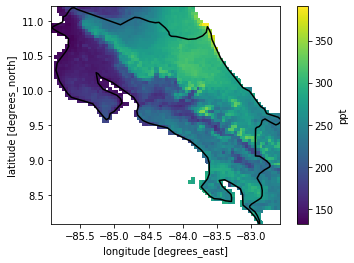

In [43]:
ax= costa_rica.boundary.plot(color='black')
ppt.plot(ax=ax)

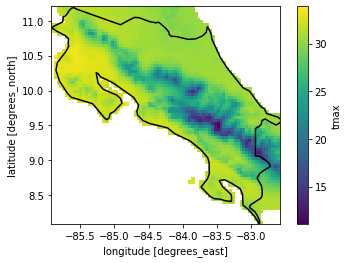

In [57]:
ax= costa_rica.boundary.plot(color='black')
tmax.plot(ax=ax)

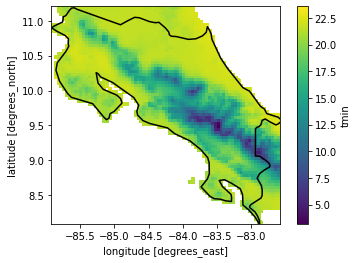

In [58]:
ax= costa_rica.boundary.plot(color='black')
tmin.plot(ax=ax)

# Land Cover Data

Spatial Resolution: 300 m

Temperal Resolution: annual basis from 2016 to 2019

Reference: ESA Climate Change Initiative - Land Cover led by UCLouvain (2017)

In [47]:
# download and unzip land cover data
!wget ftp://geo10.elie.ucl.ac.be/CCI/LandCover/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip
!unzip ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip

--2022-10-12 15:20:47--  ftp://geo10.elie.ucl.ac.be/CCI/LandCover/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip
           => ‘ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip’
Resolving geo10.elie.ucl.ac.be (geo10.elie.ucl.ac.be)... 130.104.104.210
Connecting to geo10.elie.ucl.ac.be (geo10.elie.ucl.ac.be)|130.104.104.210|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /CCI/LandCover ... done.
==> SIZE ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip ... 2496631533
==> PASV ... done.    ==> RETR ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip ... done.
Length: 2496631533 (2.3G) (unauthoritative)

ESACCI-LC-L4-LCCS-M 100%[===================>]   2.32G  30.3MB/s    in 83s     

2022-10-12 15:22:13 (28.6 MB/s) - ‘ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip’ saved [2496631533]

Archive:  ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip
  inflating: ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.

In [48]:
# read land cover data
lc = xr.open_dataset('ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc')

In [52]:
# select land cover for CR's extent
lc = lc.sel(lon=slice(minx, maxx), lat=slice(maxy, miny))

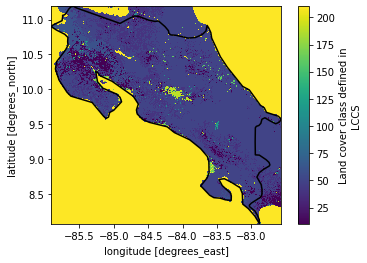

In [53]:
# plot land conver data
ax= costa_rica.boundary.plot(color='black')
lc['lccs_class'].plot(ax=ax)